In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
df_rt = pd.read_csv('RTs.csv')


In [47]:
df_rt

,Unnamed: 0,participant_id,condition,Trial,ITs,block,MTs
0,0,0,Sudden,0,0.000074,0,0.180820
1,1,1,Gradual,0,0.000075,0,0.274499
2,2,2,Sudden,0,0.000134,0,0.124207
3,3,3,Gradual,0,0.883418,0,0.133209
4,4,4,Sudden,0,0.920651,0,1.510810
...,...,...,...,...,...,...,...
10747,10747,9,Gradual,767,0.780795,11,0.190099
10748,10748,10,Sudden,767,0.733294,11,0.150234
10749,10749,11,Gradual,767,1.200126,11,0.216987
10750,10750,12,Sudden,767,0.560747,11,0.350405


In [4]:
df_mean_rts = df_rt.groupby(['block', 'participant_id', 'condition']).mean().reset_index()

In [6]:
df_mean_rts

,block,participant_id,condition,Unnamed: 0,Trial,ITs,MTs
0,0,0,Sudden,441.0,31.5,0.030669,0.047369
1,0,1,Gradual,442.0,31.5,0.032213,0.013919
2,0,2,Sudden,443.0,31.5,0.000002,0.001941
3,0,3,Gradual,444.0,31.5,0.816977,1.559555
4,0,4,Sudden,445.0,31.5,0.771165,0.756828
...,...,...,...,...,...,...,...
163,11,9,Gradual,10306.0,735.5,0.902405,0.387638
164,11,10,Sudden,10307.0,735.5,1.124377,0.268017
165,11,11,Gradual,10308.0,735.5,1.040078,0.328077
166,11,12,Sudden,10309.0,735.5,0.850612,0.403674


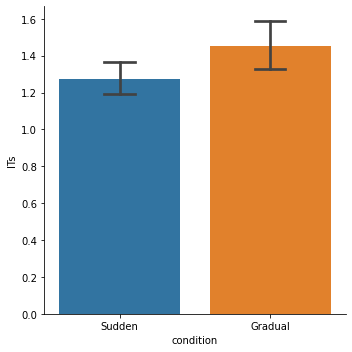

In [5]:
sns.catplot(y = 'ITs', x = 'condition', data = df_mean_rts, kind = 'bar', ci = 95, capsize = 0.2)

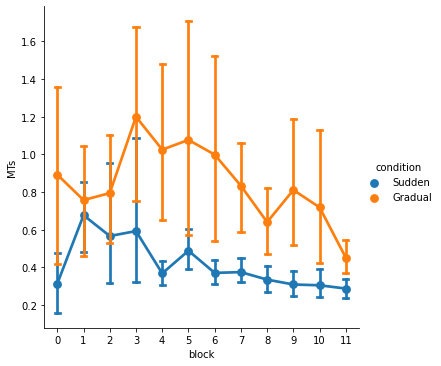

In [58]:
sns.catplot(x = 'block', y = 'MTs', hue = 'condition', data = df_mean_rts, kind = 'point', ci = 95, capsize = 0.2)

In [10]:
error_df = pd.read_csv('Angular_errors.csv')
error_speed_df = pd.read_csv('Angular_Errors_speed.csv')

In [2]:
curvatures = pickle.load(open('curvatures_smooth_all.pickle', 'rb'))

In [8]:
errors_df = pd.DataFrame({'participant_id': np.repeat(np.arange(64), 768), 
                         'trial_no': np.tile(np.arange(768), 64),
                         'block_no': np.tile(np.repeat(np.arange(12), 64), 64),
                         'errors': np.ravel(curvatures),
                         'Rotation': np.tile(np.repeat(['Sudden', 'Gradual'], 768), 32),
                         'Emphasis': np.repeat(['Accuracy', 'Speed'], 768*32)}                        
                        )

In [ ]:
sns.set(font_scale = 2)
sns.set_style('white')
colors = [ '#292421', '#808A87' ]
sns.set_palette(sns.color_palette(colors))

g = sns.relplot(x = 'trial_no', y = 'errors', hue = 'Rotation', row = 'Emphasis', style='Emphasis', 
                 style_order=['Accuracy', 'Speed'], row_order=['Speed', 'Accuracy'],
            data = errors_df, height = 6, aspect = 2.5, kind = 'line')
g.set_axis_labels('Trial', 'Angular Error (radians)')

# draw lines:
for ax in g.axes.ravel():
    ax.vlines(x = 64, ymax=1.5, ymin = -0.1, color = 'black', linestyles = '--')
    ax.vlines(x = 704, ymax=1.5, ymin = -0.1, color = 'black', linestyles = '--')

#plt.vlines(x = 64, ymax=1.2, ymin = -0.1, color = 'black', linestyles = '--')
#plt.vlines(x = 704, ymax=1.2, ymin = -0.1, color = 'black', linestyles = '--')
    plt.text(x = -20, y = 1.25, s = 'Baseline')
    plt.text(x = 400, y = 1.25, s = 'Rotation')
    plt.text(x = 720, y = 1.25, s = 'Washout')

plt.text(x = -20, y = 3.5, s = 'Baseline')
plt.text(x = 400, y = 3.5, s = 'Rotation')
plt.text(x = 720, y = 3.5, s = 'Washout')

sns.despine(bottom=False, left=False)
plt.savefig('figures/no_feedback_trial_data_all_conditions.png', dpi = 600, bbox_inches = 'tight')

Text(0.5, 1.0, 'No Feedback')

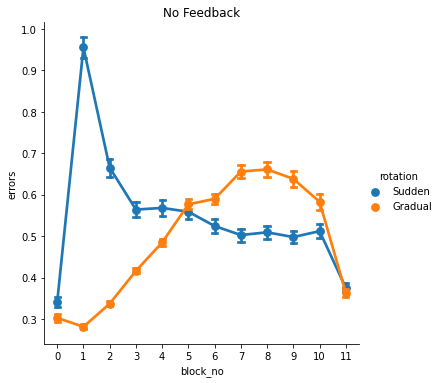

In [12]:
colors = []
sns.catplot(x = 'block_no', y = 'errors', 
            hue = 'rotation',
            data = errors_df, kind = 'point', 
            ci = 95, capsize = 0.2, 
           )
plt.title('No Feedback')

Text(0.5, 1.0, 'No Feedback')

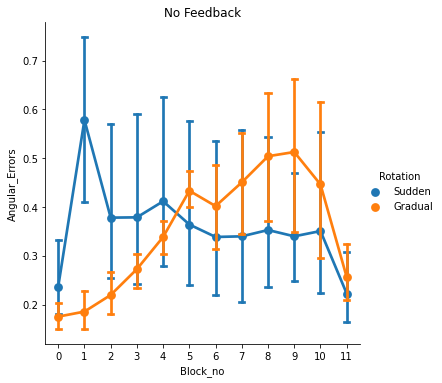

In [37]:
sns.catplot(x = 'Block_no', y = 'Angular_Errors', 
            hue = 'Rotation', 
            data = df_mean_errors_speed, kind = 'point', 
            ci = 95, capsize = 0.2, 
           )
plt.title('No Feedback')

Text(0.5, 1.0, 'No Feedback')

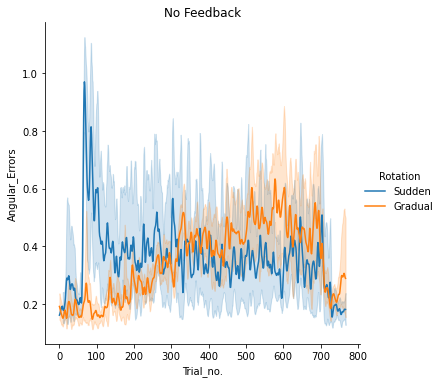

In [38]:
sns.relplot(x = 'Trial_no.', y = 'Angular_Errors', hue = 'Rotation', data = error_speed_df, kind = 'line')
plt.title('No Feedback')

In [8]:
block_wise = errors_df.groupby(['participant_id', 'block_no', 'rotation', 'emphasis']).mean().reset_index()

Text(0.5, 1.0, 'Block 11: Washout')

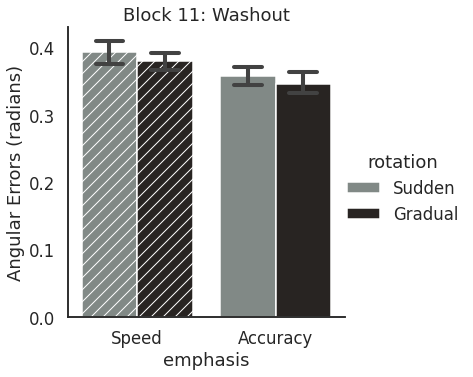

In [30]:
sns.set_context('talk')
g = sns.catplot(x = 'emphasis', y = 'errors', order = ['Speed', 'Accuracy'],
            hue = 'rotation', 
            data = errors_df[errors_df['block_no'] == 11], kind = 'bar', 
            ci = 95, capsize = 0.2, 
           )
g.set(ylabel='Angular Errors (radians)')

hatches = ['//', '', '//', '']
num_locations = len(errors_df.rotation.unique())
for i, patch in enumerate(g.ax.patches):
    #if i % num_locations == 0:
    #print(i)
    #print(patch)
    patch.set_hatch(hatches[i])

plt.title('Block 11: Washout')


In [11]:
block_wise

,participant_id,block_no,rotation,emphasis,trial_no,errors
0,0,0,Sudden,Accuracy,31.5,1.222246
1,0,1,Sudden,Accuracy,95.5,0.669200
2,0,2,Sudden,Accuracy,159.5,0.320817
3,0,3,Sudden,Accuracy,223.5,0.259095
4,0,4,Sudden,Accuracy,287.5,0.300717
...,...,...,...,...,...,...
763,63,7,Gradual,Speed,479.5,1.124124
764,63,8,Gradual,Speed,543.5,1.277725
765,63,9,Gradual,Speed,607.5,1.365361
766,63,10,Gradual,Speed,671.5,1.497375


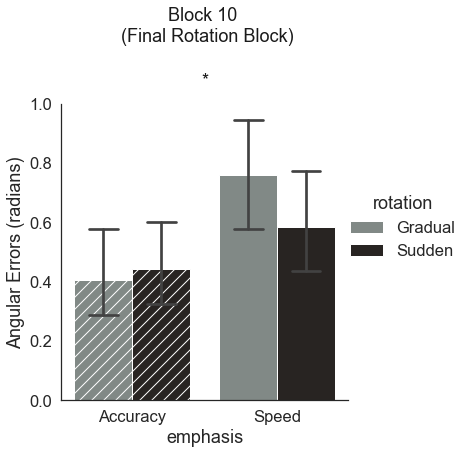

In [21]:
from itertools import cycle
#sns.set_context('paper')
sns.set(font_scale = 1.5)
sns.set_style('white')
colors = [ '#808A87', '#292421']
#'#D3D3D3',
sns.set_palette(sns.color_palette(colors))

g = sns.catplot(x = 'emphasis', y = 'errors', hue = 'rotation', hue_order=['Gradual', 'Sudden'],
            data = block_wise.loc[(block_wise['block_no'] == 10)],  capsize = 0.2, kind = 'bar')
g.set(ylabel='Angular Errors (radians)')
#x1, x2 = 0.8, 1.2
#y, h, col = block_wise.loc[(block_wise['Block'] == 10)]['Errors'].max()-0.3, 0.02, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

hatches = ['//', '', '//', '']
num_locations = len(block_wise.rotation.unique())
for i, patch in enumerate(g.ax.patches):
    #if i % num_locations == 0:
    #print(i)
    #print(patch)
    patch.set_hatch(hatches[i])
x1, x2 = 0, 1
y, h, col = block_wise.loc[(block_wise['block_no'] == 10)]['errors'].max()-0.35, 0.02, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h-0.25, "*", ha='center', va='bottom', color=col)
plt.ylim((0, 1))

#x1, x2 = -0.2, 0.2
#y, h, col = block_wise.loc[(block_wise['Block'] == 10)]['Errors'].max()-0.3, 0.02, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
plt.text(0.5, y+h+0.15-0.25, "Block 10 \n (Final Rotation Block)", ha='center', va='bottom', color=col)
plt.savefig('figures/no_feedback_block10.png', dpi = 600, bbox_inches = 'tight')

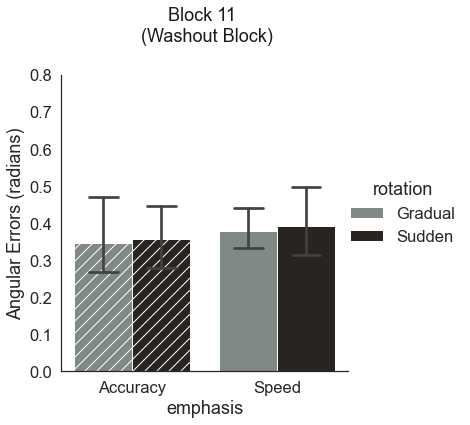

In [31]:
sns.set(font_scale = 1.5)
sns.set_style('white')
colors = [ '#808A87', '#292421']
#'#D3D3D3',
sns.set_palette(sns.color_palette(colors))
g = sns.catplot(x = 'emphasis', y = 'errors', hue = 'rotation', hue_order=['Gradual', 'Sudden'],
            data = block_wise.loc[(block_wise['block_no'] == 11)], kind = 'bar', capsize = 0.2)
plt.ylim((0, 0.8))
g.set(ylabel='Angular Errors (radians)')
#x1, x2 = 0, 1
#y, h, col = block_no_wise.loc[(block_no_wise['block_no'] == 11)]['Errors'].max()-0.2, 0.02, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

x1, x2 = 0.8, 1.2
y, h, col = block_wise.loc[(block_wise['block_no'] == 11)]['errors'].max()-0.1, 0.02, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

#x1, x2 = -0.2, 0.2
#y, h, col = block_wise.loc[(block_wise['block_no'] == 11)]['errors'].max()-0.1, 0.02, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

hatches = ['//', '', '//', '']
num_locations = len(block_wise.rotation.unique())
for i, patch in enumerate(g.ax.patches):
    #if i % num_locations == 0:
    #print(i)
    #print(patch)
    patch.set_hatch(hatches[i])


plt.text(0.5, y+h+0.15-0.25, "Block 11 \n (Washout Block)", ha='center', va='bottom', color=col)
plt.savefig('figures/no_feedback_block11.png', dpi = 600, bbox_inches = 'tight')

In [37]:
model = smf.ols('errors~rotation*emphasis', data = block_wise.loc[(block_wise['block_no'] == 10)]).fit()
aov = sm.stats.anova_lm(model, typ = 2)
aov

,sum_sq,df,F,PR(>F)
rotation,0.079854,1.0,0.705267,0.404354
emphasis,0.976715,1.0,8.626245,0.004694
rotation:emphasis,0.180858,1.0,1.597317,0.211172
Residual,6.793555,60.0,NaN,NaN
